In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv("C:/Users/ADMIN/Downloads/Social_Network_Ads (1).csv")
dataset.head(10)


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


In [4]:
# Chia tập dữ liệu
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [5]:
# chuẩn hóa
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [6]:
# Huấn luyện
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


In [7]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Tính các thông số
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Làm tròn các giá trị
accuracy = round(accuracy, 2)
precision = round(precision, 2)
recall = round(recall, 2)
f1 = round(f1, 2)

# Tạo DataFrame
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
})
metrics_df_horizontal = metrics_df.transpose()
metrics_df_horizontal.columns = metrics_df_horizontal.iloc[0]
metrics_df_horizontal = metrics_df_horizontal[1:]
metrics_df_horizontal

metrics_df_horizontal


Metric,Accuracy,Precision,Recall,F1 Score
Score,0.9,0.92,0.75,0.83


In [8]:
# ma trận nhầm lẫn
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)



[[66  2]
 [ 8 24]]


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1592\2747109103.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y == label, 0], X[y == label, 1],


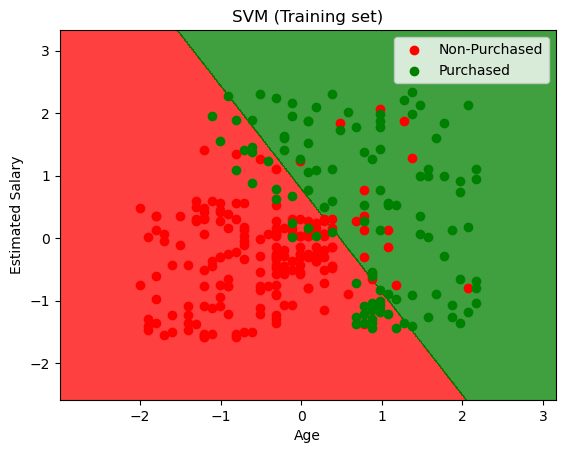

In [9]:
# Trực quan
from matplotlib.colors import ListedColormap
def plot_decision_boundary(X, y, classifier, title, label_0, label_1):
    X1, X2 = np.meshgrid(np.arange(start = X[:, 0].min() - 1, stop = X[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X[:, 1].min() - 1, stop = X[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    # Plot points with custom labels
    for i, label in enumerate(np.unique(y)):
        plt.scatter(X[y == label, 0], X[y == label, 1],
                    c = ListedColormap(('red', 'green'))(i), label = label_1 if label == 1 else label_0)

    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

plot_decision_boundary(X_train, y_train, classifier, 'SVM (Training set)', 'Non-Purchased', 'Purchased')
